<a href="https://colab.research.google.com/github/ruthpeter/IDS_Using_Machine_Learning/blob/master/IDS_using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Analysis of KDD dataset using Deep Learning</h1>
<p>We are using the KDD 21 dataset for analysing malicious data. Our aim is to detect intrusion using the data in the KDD dataset. We follow the following steps to make our analysis and predictions on the data: </p>
<ul>
  <li> Data Preprocessing</li>
  <li> Building Model</li>
  <li> Training Model</li>
  <li> Testing Model</li>
 </ul>
 
 The following sections go in detail on how each section is done.

The NSL-KDD dataset generated in 2009 is widely used in intrusion detection experiments. In the latest literature, all the researchers use the NSL-KDD as the benchmark dataset, which not only effectively solves the inherent redundant records problems of the KDD Cup 1999 dataset but also makes the number of records reasonable in the training set and testing set, in such a way that the classifier does not favour more frequent records. The dataset covers the KDDTrain + dataset as the training set and KDDTest + and KDDTest −21 datasets as the testing set, which has different
21956 normal records and four different types of attack records. The KDDTest −21 dataset is a subset of the KDDTest + and is more difficult for classification. There are 41 features and 1 class label for every traffic record, and the features include basic features (No.1-No.10), content features (No.11 - No.22), and traffic features (No.23 - No.41) as shown in table. According to their characteristics, attacks in the dataset are categorized into four attack types: DoS (Denial of Service attacks), R2L (Root to Local attacks), U2R (User to Root attack), and Probe (Probing attacks). The testing set has some specific attack types that disappear in the training set, which allows it to provide a more realistic theoretical basis for intrusion detection
<br>
<br>

---


![alt text](https://www.researchgate.net/publication/325709588/figure/tbl1/AS:669212834004994@1536564181027/List-of-features-of-NSL-KDD-dataset.png)

<br>
<br>

![alt text](https://ai2-s2-public.s3.amazonaws.com/figures/2017-08-08/a4564c2dabb7888ff7a6e32d0d730809a98b7eeb/4-TableI-1.png)

In [0]:
# All import statements and Drive helper
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import keras
import sklearn
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

# This will prompt for authorization.
drive.mount('/content/drive/')


Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


<h2>Data Preprocessing</h2>
Data cleaning was done in a seperate file locally since the dataset consists of over 1 lakh entries.
We first removed the features providing metadata on the given columns i.e. redundant collumns are removed.Then the features represented in text format is conveted to number format and the mapping of the same is stored in a json file to make sense of the data at a later time.The next step is to seperate the labels from the actual data because in the imported data both of them are combined.There are 38 numeric features and 3 nonnumeric features in the NSL-KDD dataset. Because the input value of IDS should be a numeric matrix, we must convert some nonnumeric features, such as ‘protocol_type’, ‘service’ and ‘flag’ features, into numeric form. 



We import the data from Google Drive, namely the test and train data which is stored in the data directory of Google Colab.

In [0]:
train_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/train.csv",sep=",")
test_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/test.csv",sep=",")
print("Size of training set is",train_df.values.shape[0])
print("Size of test set is",test_df.values.shape[0])

Size of training set is 125972
Size of test set is 22542


In [0]:
training_data = train_df.values[:,0:40]
training_labels = train_df.values[:,41]
test_data = test_df.values[:,0:40]
test_labels = test_df.values[:,41]

<h2>Building the Model</h2>
![alt text](https://cdn-images-1.medium.com/max/800/1*3FMmI_9rrB2V7-UuTjQ3dA.png)



We know that the number of features in the model is 40. Hence, we specify this to Keras along with the activation function we want in the first layer. Different layers can have different activation functions. Our neural network will have one hidden layer with 30 hidden units. The output has to have the number of classes we are expecting fromt he neural network that is 40.
<br>


In [0]:
model = Sequential([
    Dense(40,input_shape=(40,),activation="relu"),
    Dense(30,activation="relu"),
    Dense(40,activation="softmax")
])
model.summary()
model.compile(Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=["accuracy"])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_3 (Dense)              (None, 40)                1240      
Total params: 4,110
Trainable params: 4,110
Non-trainable params: 0
_________________________________________________________________


<h2>Training and Testing the Model</h2>

The following line of code trains the model as well as uses the test set to calculate its performance on unseen data. This data emulates the data in the training set with a few key differences. The test data gives a sense of direction with respect to overfitting the data. The graph of the loss and the accuracy of the model gives a proper idea of the performance of the model in sucessive epochs.

In [0]:
history = model.fit(training_data,training_labels,batch_size=10,epochs=10,shuffle=True,verbose=2,validation_data=(test_data,test_labels))

Train on 125972 samples, validate on 22542 samples
Epoch 1/10
 - 16s - loss: 2.0442 - acc: 0.8374 - val_loss: 4.7647 - val_acc: 0.6680
Epoch 2/10
 - 15s - loss: 0.4695 - acc: 0.9452 - val_loss: 4.7638 - val_acc: 0.6732
Epoch 3/10
 - 15s - loss: 0.4382 - acc: 0.9531 - val_loss: 4.7252 - val_acc: 0.6817
Epoch 4/10
 - 15s - loss: 0.4240 - acc: 0.9576 - val_loss: 5.0140 - val_acc: 0.6744
Epoch 5/10
 - 15s - loss: 0.4055 - acc: 0.9608 - val_loss: 4.8345 - val_acc: 0.6845
Epoch 6/10
 - 15s - loss: 0.4048 - acc: 0.9625 - val_loss: 4.6833 - val_acc: 0.6850
Epoch 7/10
 - 15s - loss: 0.3838 - acc: 0.9650 - val_loss: 4.6919 - val_acc: 0.6947
Epoch 8/10
 - 15s - loss: 0.3900 - acc: 0.9655 - val_loss: 4.6875 - val_acc: 0.6898
Epoch 9/10
 - 15s - loss: 0.3824 - acc: 0.9674 - val_loss: 4.7366 - val_acc: 0.6860
Epoch 10/10
 - 15s - loss: 0.3875 - acc: 0.9681 - val_loss: 5.0702 - val_acc: 0.6744


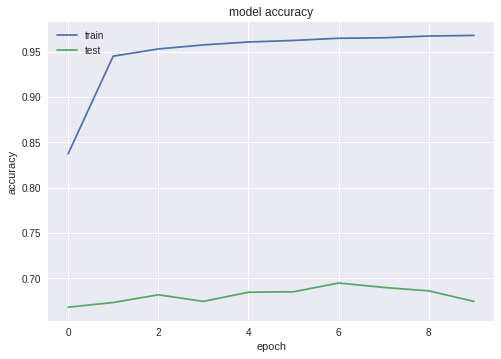

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


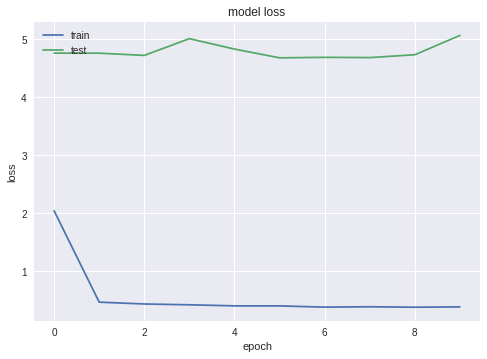

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
predictions = model.predict_classes(test_data)
#predictions = predictions.argmax(axis=1)
cm = confusion_matrix(test_labels,predictions)

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[4632    9    0 ...    0    0    0]
 [   2 8868    0 ...    0    0  224]
 [   0    7    0 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    2    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


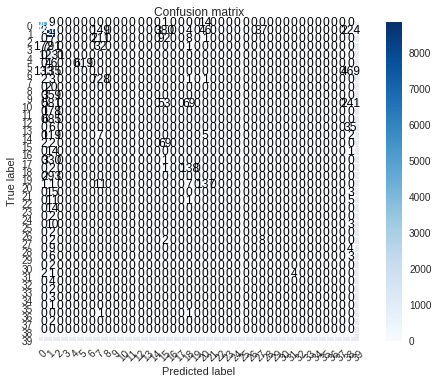

In [0]:
plot_confusion_matrix(cm,range(40))  